<a href="https://colab.research.google.com/github/Naswinda/Projects/blob/NIDA/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Naswinda/nida/main/dads6003/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
import matplotlib.pyplot as plt

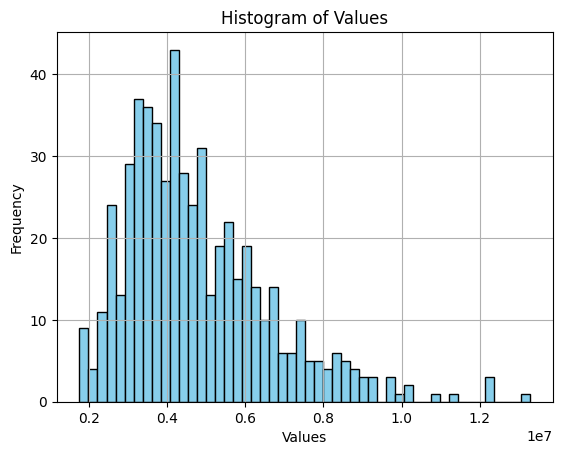

In [ ]:
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

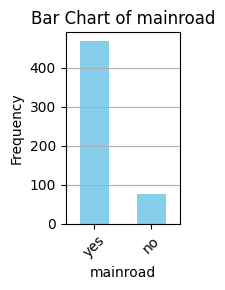

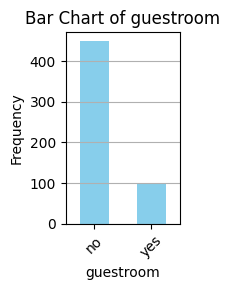

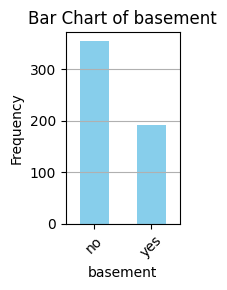

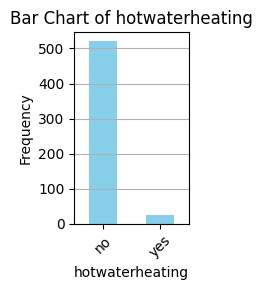

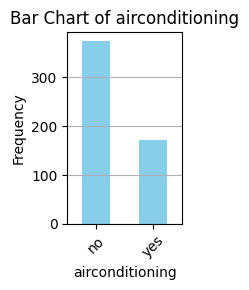

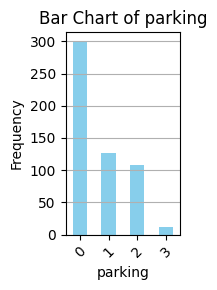

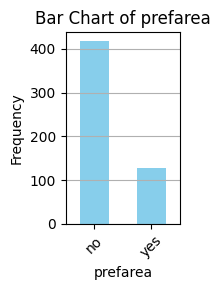

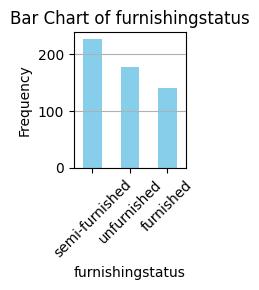

In [ ]:
categorical_columns = ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

# Plot bar chart for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(2, 3))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

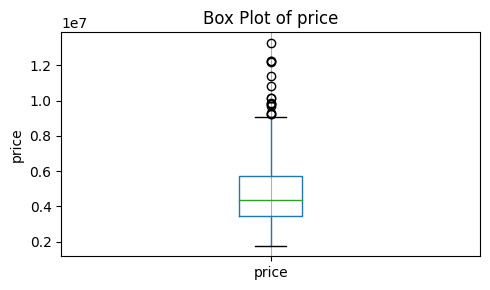

In [ ]:
numerical_columns = ['price']

# Plot box plot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(5, 3))
    df.boxplot(column=col)
    plt.ylabel(col)
    plt.title(f'Box Plot of {col}')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [ ]:
Q3 = df['price'].quantile(0.75)
Q1 = df['price'].quantile(0.25)
print(Q3)
print(Q1)

5740000.0
3430000.0


In [ ]:
IQR = Q3-Q1
low = Q1-(1.5*IQR)
high = Q3+(1.5*IQR)

print(IQR)
print(low)
print(high)

2310000.0
-35000.0
9205000.0


In [ ]:
#มีoutlier 15 ตัว
df_without_outlier = df[(df['price'] > low) & (df['price'] < high)]
df_without_outlier.reset_index(drop=True,inplace=True)
df_without_outlier.shape

(530, 13)

In [ ]:
#yes/no to dummy
df_without_outlier.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
dummy_columns = ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'prefarea', 'furnishingstatus']



In [ ]:
df_dummy = pd.get_dummies(df_without_outlier[dummy_columns])
df_dummy

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0
1,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1
2,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
3,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0
4,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
526,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
527,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
528,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [ ]:
numer_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories',
       'parking']

In [ ]:
df_numer=df_without_outlier[numer_columns]

In [ ]:
df_numer.reset_index(drop=True,inplace=True)
df_dummy.reset_index(drop=True,inplace=True)

In [ ]:
df_final = pd.concat((df_numer,df_dummy),axis=1)
df_final

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9100000,6000,4,1,2,2,0,1,1,0,...,1,1,0,1,0,1,0,0,1,0
1,9100000,6600,4,2,2,1,0,1,0,1,...,1,1,0,0,1,0,1,0,0,1
2,8960000,8500,3,2,4,2,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
3,8890000,4600,3,2,2,2,0,1,0,1,...,0,1,0,0,1,1,0,1,0,0
4,8855000,6420,3,2,2,1,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
526,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
527,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
528,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
X=df_final.drop('price',axis=1)
y=df_final['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X train: ',X_train.shape)
print('X test: ',X_test.shape)

X train:  (424, 20)
X test:  (106, 20)


In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Intercept: ',model.intercept_)
print('Coefficient: ',model.coef_)

Intercept:  2112117.3642082033
Coefficient:  [ 1.99970030e+02  1.01584495e+05  8.11994474e+05  4.12331227e+05
  1.69705311e+05 -2.03179717e+05  2.03179717e+05 -1.89801721e+05
  1.89801721e+05 -1.58490760e+05  1.58490760e+05 -3.99736162e+05
  3.99736162e+05 -3.81662607e+05  3.81662607e+05 -2.91324908e+05
  2.91324908e+05  1.37976523e+05  5.26244919e+04 -1.90601015e+05]


In [ ]:
df_final.columns
data_coef={
    'Features':X.columns,
    'Coefficient':model.coef_}
df_coef = pd.DataFrame(data_coef)
print(model.intercept_)
df_coef

2112117.3642082033


,Features,Coefficient
0,area,199.970030
1,bedrooms,101584.494989
2,bathrooms,811994.474386
3,stories,412331.226920
4,parking,169705.311267
5,mainroad_no,-203179.717439
6,mainroad_yes,203179.717439
7,guestroom_no,-189801.720849
8,guestroom_yes,189801.720849
9,basement_no,-158490.760315


In [ ]:
model.score(X_test,y_test)

0.6684003582833378

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

# Assuming you have already fitted your model and made predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 784877.2641074916
Mean Squared Error (MSE): 1148203524699.7412
Root Mean Squared Error (RMSE): 1071542.5911739306


In [ ]:
# save the model to disk
import pickle
filename = 'ml_6610412005.sav'
pickle.dump(model, open(filename, 'wb'))
